In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

salesmanbin_fp = 'assets/salesmanbin.sec'

### Part A

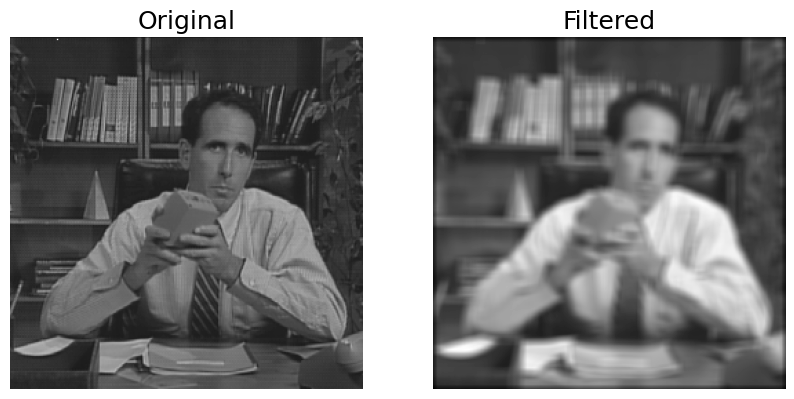

In [18]:
def read_bin(file_path, size):
    with open(file_path, 'rb') as file:
        data = np.fromfile(file, dtype=np.uint8, count=size*size)
        return np.reshape(data, (size, size))

def stretch(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image)) * 255.0


X = read_bin(salesmanbin_fp, size = 256)

# Original Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original', fontsize=18)


# 7x7 average filter using linear convolution
X2 = np.zeros((262, 262))
X2[4:260, 4:260] = X
Y2 = np.zeros((262, 262))
for row in range(4, 261):
    for col in range(4, 261):
        Y2[row, col] = np.sum(X2[row-3:row+4, col-3:col+4]) / 49

Y = stretch(Y2[4:260, 4:260])

# Display the filtered image
plt.subplot(1,2, 2)
plt.imshow(Y, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Filtered', fontsize=18)

plt.show()

Y1a = Y

### Part B

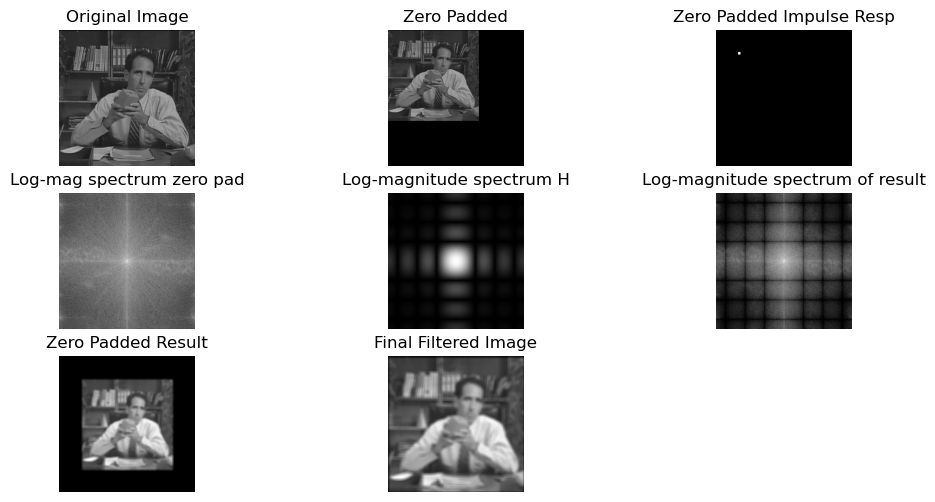

In [19]:
def pltshow(subplot, data, title):
    plt.subplot(subplot[0], subplot[1], subplot[2])
    plt.imshow(data, cmap='gray')
    plt.title(title, fontsize=12)
    plt.axis('off')

# Make the 128x128 impulse response image
plt.figure(figsize=(12, 6))

pltshow((3, 3, 1), X, 'Original Image')


# Zero pad the original image and the H image
Padsize = 256 + 128 - 1
ZPX = np.zeros((Padsize, Padsize))
ZPX[:256, :256] = X

pltshow((3, 3, 2), ZPX, 'Zero Padded')



H = np.zeros((128, 128))
H[62:69, 62:69] = 1 / 49

ZPH = np.zeros((Padsize, Padsize))
ZPH[:128, :128] = H

pltshow((3, 3, 3), ZPH, 'Zero Padded Impulse Resp')


# Compute DFT's of zero-padded images
ZPXtilde = np.fft.fft2(ZPX)
ZPHtilde = np.fft.fft2(ZPH)

# Show centered log-magnitude spectra
ZPXtildeDisplay = np.log(1 + np.abs(np.fft.fftshift(ZPXtilde)))


pltshow((3, 3, 4), ZPXtildeDisplay, 'Log-mag spectrum zero pad')


ZPHtildeDisplay = np.log(1 + np.abs(np.fft.fftshift(ZPHtilde)))

pltshow((3, 3, 5), ZPHtildeDisplay, 'Log-magnitude spectrum H')


# Compute the convolution by pointwise multiplication of DFT's
ZPYtilde = ZPXtilde * ZPHtilde
ZPY = np.fft.ifft2(ZPYtilde)

# Show the resulting zero-padded image and its centered log-magnitude spectrum
ZPYtildeDisplay = np.log(1 + np.abs(np.fft.fftshift(ZPYtilde)))

pltshow((3, 3, 6), ZPYtildeDisplay, 'Log-magnitude spectrum of result')

pltshow((3, 3, 7), np.real(ZPY), 'Zero Padded Result')


# Extract the final result image and display
Y = np.real(ZPY[64:320, 64:320])

pltshow((3, 3, 8), Y, 'Final Filtered Image')

plt.show()

### Part C

(256, 256)


C:\Users\trido\AppData\Local\Temp\ipykernel_8048\180736269.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  return y.astype(np.uint8)


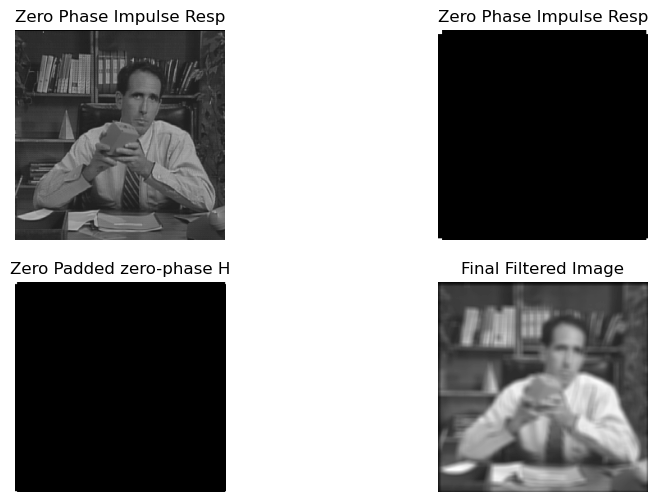

In [20]:
def stretch(x):
    """
    full-scale contrast stretch
    """
    xMax = np.max(x)
    xMin = np.min(x)
    scale_factor = 255.0 / (xMax - xMin)
    y = np.round((x - xMin) * scale_factor)
    return y.astype(np.uint8)


# Make the 256x256 impulse response image
H1 = np.zeros((256, 256))
H1[126:133, 126:133] = 1/49

# Get the true zero-phase impulse response image using fftshift
H2 = np.fft.fftshift(H1)
print(H2.shape)


# Display the zero-phase impulse response image
plt.figure(figsize=(10, 6))

pltshow((2, 2, 1), stretch(X), 'Zero Phase Impulse Resp')
pltshow((2, 2, 2), stretch(H2), 'Zero Phase Impulse Resp')

# Zero pad the input image
ZPX = np.zeros((512, 512))
ZPX[:256, :256] = X

# Make the zero-padded zero-phase impulse response image
ZPH2 = np.zeros((512, 512))
ZPH2[:128, :128] = H2[:128, :128]
ZPH2[:128, 385:512] = H2[:128, 129:256]
ZPH2[385:512, :128] = H2[129:256, :128]
ZPH2[385:512, 385:512] = H2[129:256, 129:256]

# Display the zero-padded zero-phase impulse response image
pltshow((2, 2, 3), stretch(ZPH2), 'Zero Padded zero-phase H')


# Compute the filtered result by pointwise multiplication of DFTs
Y = np.fft.ifft2(np.fft.fft2(ZPX) * np.fft.fft2(ZPH2))
Y = stretch(Y[:256, :256])

pltshow((2, 2, 4), Y, 'Final Filtered Image')

plt.show()
